In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

Preview

In [3]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


1. Summary Statistics

In [4]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Missing values

In [5]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
df.drop(columns=['Comments'], inplace=True)

2. Outlier Detection

In [7]:
from scipy.stats import zscore

# Select relevant columns
z_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[z_columns].apply(zscore)

# Flag rows with any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)

# Count of outliers
print(f"Number of outlier rows: {outliers.sum()}")

# view them
df[outliers].head()

Number of outlier rows: 16292


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6


In [8]:
# Remove outlier rows
df_clean = df[~outliers].copy()

In [9]:
# Export Cleaned CSV
df_clean.to_csv('../data/sierraleone_clean.csv', index=False)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('../data/sierraleone_clean.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

Plot Time Series

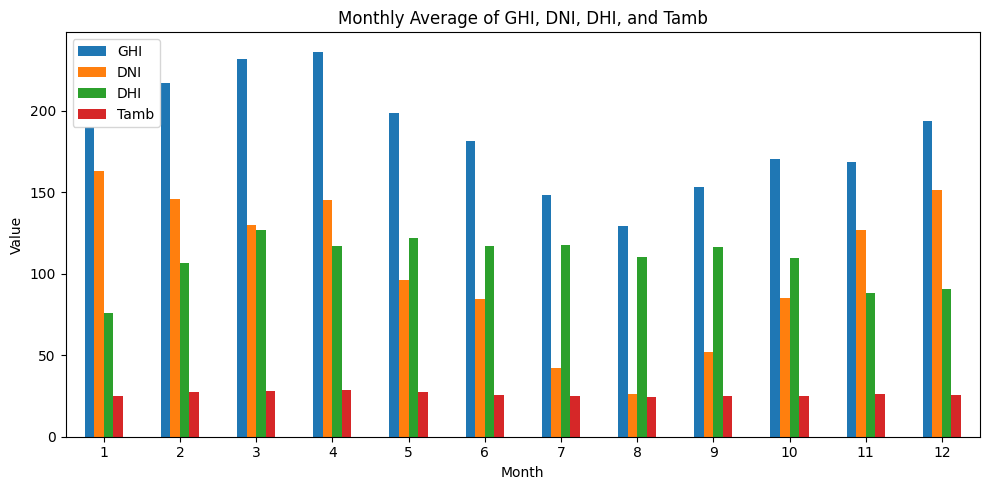

In [11]:
df['Month'] = df['Timestamp'].dt.month

# Monthly average
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_avg.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('Value')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap of Correlation

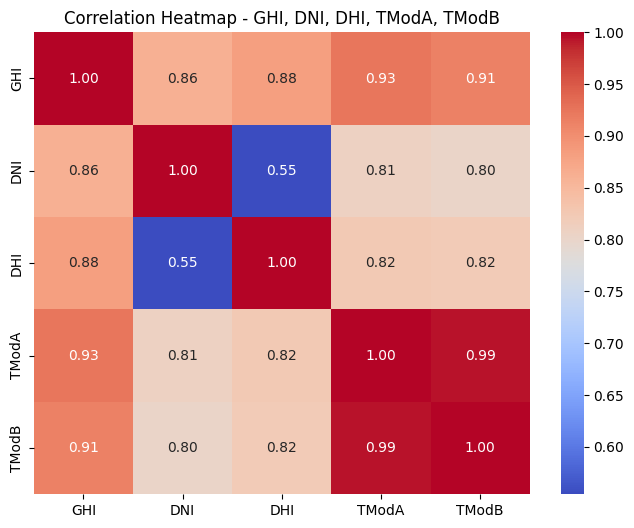

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - GHI, DNI, DHI, TModA, TModB")
plt.show()

scatter plots

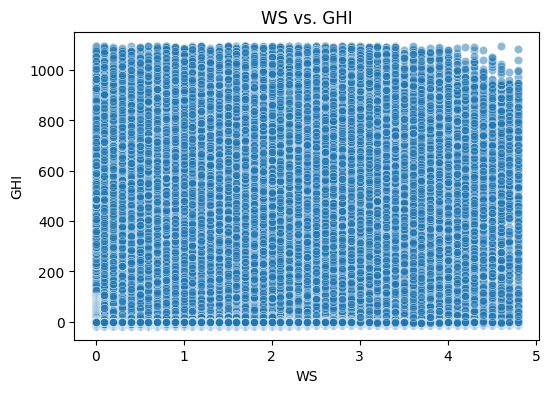

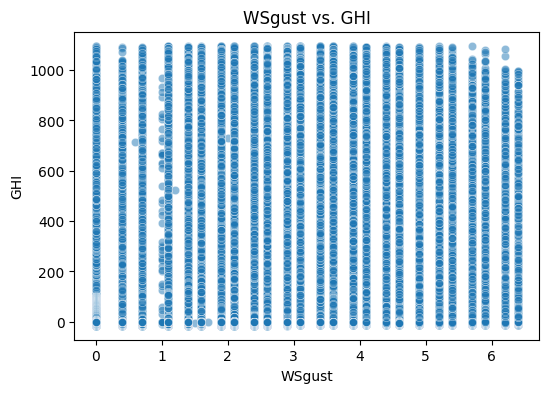

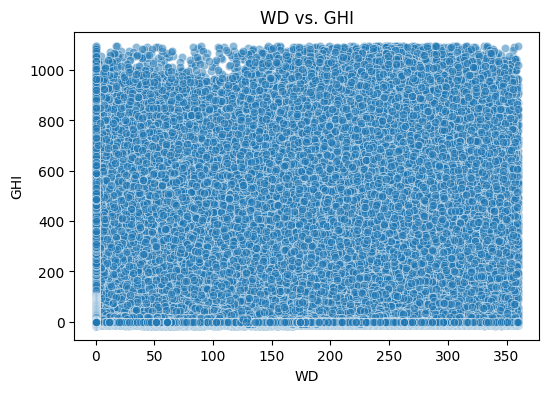

In [13]:
scatter_cols = ['WS', 'WSgust', 'WD']
for col in scatter_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_clean, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.show()

Relative Humidity vs. Tamb

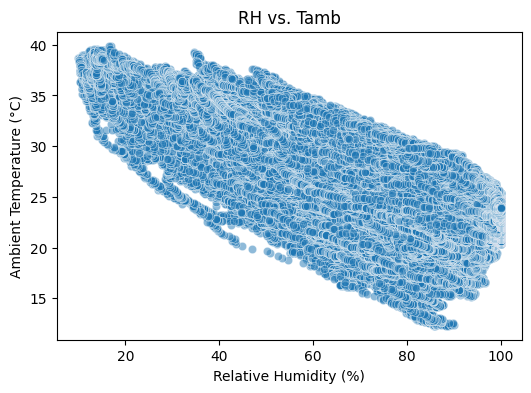

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

plot the wind rose

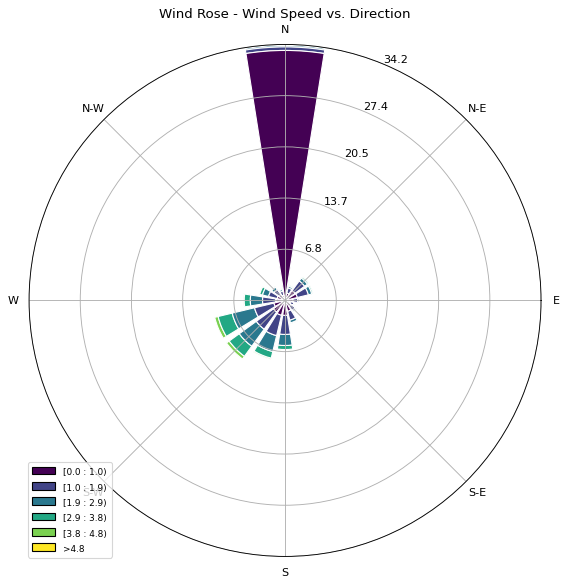

In [15]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose - Wind Speed vs. Direction")
plt.show()

Histogram

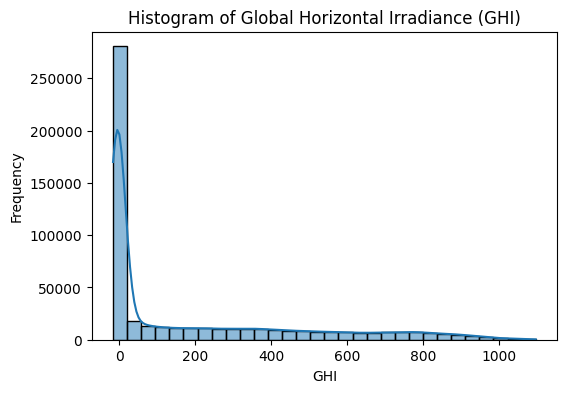

In [16]:
# GHI Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['GHI'], bins=30, kde=True)
plt.title("Histogram of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

Temprature Analysis

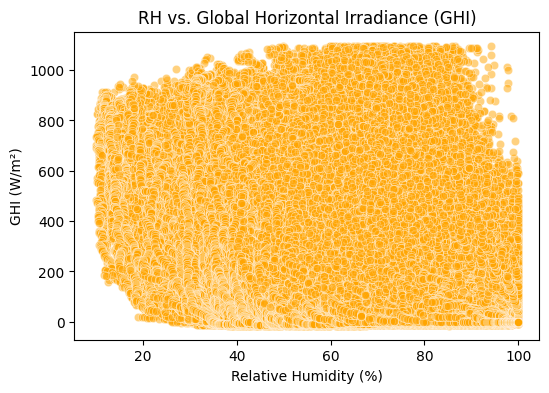

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_clean['RH'], y=df_clean['GHI'], alpha=0.5, color='orange')
plt.title("RH vs. Global Horizontal Irradiance (GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.show()

Bubble Chart

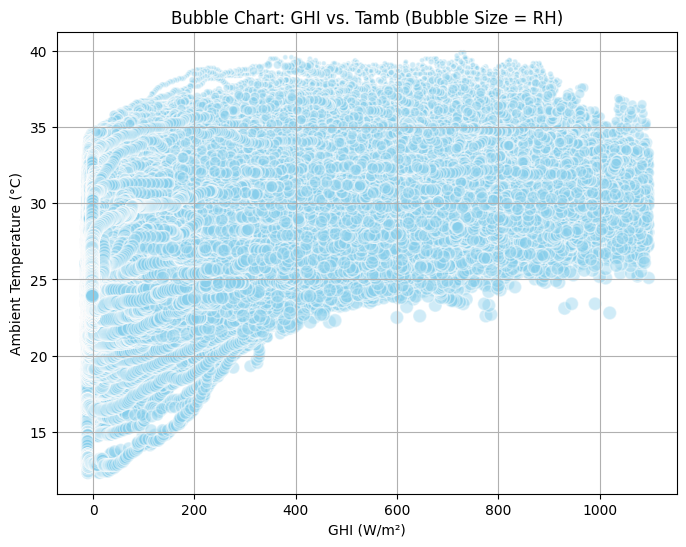

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df_clean['GHI'], 
    df_clean['Tamb'], 
    s=df_clean['RH'],   # Bubble size
    alpha=0.4, 
    c='skyblue', 
    edgecolors='w'
)
plt.title('Bubble Chart: GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True)
plt.show()